# Modul 03 - 1-Qubit Gatter I

Eine Schulungsserie der Meetup-Gruppe **[Quantum Computing meets Business - Rhineland](https://www.meetup.com/de-DE/Quantum-Computing-meets-Business-Rhineland/)**

(Adapted from [qiskit-textbook](https://github.com/qiskit-community/qiskit-textbook))

In [1]:
run ./00-Inhalt_Tools.ipynb

Im vorigen Abschnitt haben wir uns alle möglichen Zustände angesehen, die ein Qubit einnehmen kann. Wir haben gesehen, dass Qubits durch 2D-Vektoren dargestellt werden können und dass ihre Zustände auf die Form beschränkt sind:

$$ |q\rangle = \cos{(\tfrac{\theta}{2})}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

Dabei sind $\theta$ und $\phi$ reelle Zahlen. In diesem Abschnitt werden wir Gatter behandeln, die Operationen, die ein Qubit zwischen diesen Zuständen verändern. Aufgrund der Anzahl der Gatter und der Ähnlichkeiten zwischen ihnen, läuft dieses Kapitel Gefahr, zu einer Liste zu werden. Um dem entgegenzuwirken, haben wir ein paar Abschweifungen eingefügt, um wichtige Ideen an geeigneten Stellen im Kapitel einzuführen.

## Inhaltsverzeichnis    

1. [Die Pauli Gatter](#pauli)    
    1.1 [Das X-Gatter](#xgate)    
    1.2 [Das Y & Z-Gatter](#ynzgatez)    
2. [Exkurs: Die X, Y & Z-Basis](#xyzbases)     

In Die Atome der Logik sind wir auf einige Gatter gestoßen und haben sie benutzt, um eine klassische Berechnung durchzuführen. Eine wichtige Eigenschaft von Quantenschaltungen ist, dass die Operationen (Gatter) zwischen der Initialisierung der Qubits und ihrer Messung immer umkehrbar sind! Diese reversiblen Gatter können als Matrizen und als Rotationen um die Bloch-Kugel dargestellt werden. 

In [2]:
from qiskit import QuantumCircuit, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

## 1. Die Pauli Gatter <a id="pauli"></a>
Sie sollten mit den Pauli-Matrizen aus dem Abschnitt über lineare Algebra vertraut sein. Wenn etwas von der Mathematik hier für Sie neu ist, sollten Sie den Abschnitt über lineare Algebra verwenden, um sich auf den neuesten Stand zu bringen. Wir werden hier sehen, dass die Pauli-Matrizen einige sehr häufig verwendete Quantengatter darstellen können.

### 1.1 Das X-Gatter <a id="xgate"></a>
Das X-Gatter wird durch die Pauli-X-Matrix dargestellt:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

Um zu sehen, welchen Effekt ein Gatter auf ein Qubit hat, multiplizieren wir einfach den Zustandsvektor des Qubits mit dem Gatter. Wir können sehen, dass das X-Gatter die Amplituden der Zustände $|0\rangle$ und $|1\rangle$ schaltet:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$





<details>
  <summary>Erinnerung: Multiplikation von Vektoren mit Matrizen (Klicken Sie hier, um zu erweitern) </summary>
    <p>
      Die Matrizenmultiplikation ist eine Verallgemeinerung des inneren Produkts, das wir im letzten Kapitel gesehen haben. 
      Im speziellen Fall der Multiplikation eines Vektors mit einer Matrix (wie oben gesehen), erhalten wir immer einen Vektor zurück:
 

  $$ M|v\rangle  = \begin{bmatrix}a & b \\ c & d \\\end{bmatrix}\begin{bmatrix}v_0 \\ v_1 \\\end{bmatrix}
                = \begin{bmatrix}a\cdot v_0 + b \cdot v_1 \\ c \cdot v_0 + d \cdot v_1\end{bmatrix} $$
  Im Quantencomputing können wir unsere Matrizen in Form von Basisvektoren schreiben:
  $$X = |0\rangle\langle1| + |1\rangle\langle0|$$
  Dies kann manchmal klarer sein als die Verwendung einer Boxmatrix, da wir sehen können, was verschiedene Multiplikationen ergeben werden:
  $$
      \begin{aligned}
      X|1\rangle & = (|0\rangle\langle1| + |1\rangle\langle0|)|1\rangle \\
                 & = |0\rangle\langle1|1\rangle + |1\rangle\langle0|1\rangle \\
                 & = |0\rangle \times 1 + |1\rangle \times 0 \\
                 & = |0\rangle
      \end{aligned}
  $$
  In der Tat, wenn wir ein Ket und einen Bra so multipliziert sehen:
  $$ |a\rangle\langle b| $$
  nennt man dies das <i>Äußere Produkt</i>, das der Regel folgt:
  $$
      |a\rangle\langle b| = 
      \begin{bmatrix}
              a_0 b_0 & a_0 b_1 & \dots  & a_0 b_n\\ 
              a_1 b_0 & \ddots  &        & \vdots \\
              \vdots  &         & \ddots & \vdots \\
              a_n b_0 & \dots   & \dots  & a_n b_n \\
      \end{bmatrix}
  $$
  Wie wir sehen, ergibt dies tatsächlich die X-Matrix, wie sie oben zu sehen ist:
  $$
      |0\rangle\langle1| + |1\rangle\langle0| = 
      \begin{bmatrix}0 & 1 \\ 0 & 0 \\\end{bmatrix} +
      \begin{bmatrix}0 & 0 \\ 1 & 0 \\\end{bmatrix} = 
      \begin{bmatrix}0 & 1 \\ 1 & 0 \\\end{bmatrix} = X
  $$
</details>

In Qiskit können wir einen kleinen Schaltkreis erzeugen, um dies zu überprüfen:

In [3]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

Schauen wir uns das Ergebnis der obigen Schaltung an. **Note:** Hier verwenden wir `plot_bloch_multivector()`, das den Zustandsvektor eines Qubits anstelle des Bloch-Vektors nimmt.

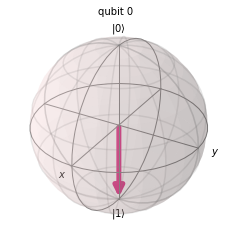

In [5]:
# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
state = svsim.run(qc).result().get_statevector()
plot_bloch_multivector(state)

Wir können tatsächlich sehen, dass der Zustand des Qubits wie erwartet $|1\rangle$ ist. Wir können uns dies als eine Drehung um $\pi$ Radiant um die *x-Achse* der Bloch-Kugel vorstellen. Das X-Gatter wird auch oft als NOT-Gatter bezeichnet, in Anlehnung an sein klassisches Analogon.

### 1.2 Die Y & Z-Gatter  <a id="ynzgatez"></a>
Ähnlich wie das X-Gatter fungieren auch die Y- & Z-Pauli-Matrizen als Y- & Z-Gatter in unseren Quantenschaltungen:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

Und, wenig überraschend, führen sie auch jeweils Rotationen um $\pi$ um die y- und z-Achse der Bloch-Kugel aus.

In Qiskit können wir die Y- und Z-Gatter auf unsere Schaltung anwenden:

In [5]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ Y ├┤ Z ├
     └───┘└───┘└───┘

## 2. Exkurs: Die X-, Y- und Z-Basen <a id="xyzbases"></a>

<details>
  <summary>Erinnerung: Eigenvektoren von Matrizen (Zum Vergrößern hier klicken) </summary>
  <p>
  Wir haben gesehen, dass die Multiplikation eines Vektors mit einer Matrix zu einem Vektor führt:

  
  $$ M|v\rangle = |v'\rangle \leftarrow \text{neuer Vektor} $$
  Wenn wir die richtigen Vektoren und Matrizen wählen, können wir einen Fall finden, in dem diese Matrixmultiplikation dasselbe ist wie eine Multiplikation mit einem Skalar:
  $$ M|v\rangle = \lambda|v\rangle $$
  (Oben ist $M$ eine Matrix, und $\lambda$ ist ein Skalar). 
  Für eine Matrix $M$ heißt jeder Vektor, der diese Eigenschaft hat, ein <i>Eigenvektor</i> von $M$. 
  Zum Beispiel sind die Eigenvektoren der Z-Matrix die Zustände $|0\rangle$ und $|1\rangle$
  $$
    \begin{aligned}
      Z|0\rangle & = |0\rangle \\
      Z|1\rangle & = -|1\rangle
    \end{aligned}
  $$
  Da wir Vektoren verwenden, um den Zustand unserer Qubits zu beschreiben, nennen wir diese Vektoren in diesem Zusammenhang oft <i>Eigenzustände</i>. 
  Eigenvektoren sind in der Quanteninformatik sehr wichtig, und es ist wichtig, dass du ein solides Verständnis von ihnen hast.

</details>

Sie werden auch bemerken, dass das Z-Gatter keinen Einfluss auf unser Qubit zu haben scheint, wenn es sich in einem dieser beiden Zustände befindet. Das liegt daran, dass die Zustände $|0\rangle$ und $|1\rangle$ die beiden _Eigenzustände_ des Z-Gatters sind. In der Tat wird die _Rechenbasis_ (die Basis, die durch die Zustände $|0\rangle$ und $|1\rangle$ gebildet wird) oft als Z-Basis bezeichnet. Dies ist nicht die einzige Basis, die wir verwenden können, eine beliebte Basis ist die X-Basis, die durch die Eigenzustände des X-Gatters gebildet wird. Wir nennen diese beiden Vektoren $|+\rangle$ und $|-\rangle$:


$$ |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

$$ |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

Eine weitere, weniger gebräuchliche Basis ist die, die durch die Eigenzustände des Y-Gatter gebildet wird. Diese werden genannt:


$$ |\circlearrowleft\rangle, \quad |\circlearrowright\rangle$$

Wir überlassen es einer Übung, diese zu berechnen. Es gibt in der Tat unendlich viele Basen; um eine zu bilden, benötigen wir einfach zwei orthogonale Vektoren.

### Kurzübung
1. Prüfen Sie ob $|+\rangle$ und $|-\rangle$ Eigenvektoren des X-Gatters sind.
2. Welche Eigenwerte haben sie? 
3. Warum sind die Eigenwerte nicht auf der Blochkugel sichtbar?
4. Finden Sie die Eigenwerte und Eigenvektoren des Y-Gatters und ihre Koordinaten auf der Blochkugel.

Diese Aufgabe können Sie entweder mit Papier und Stift oder durch Programmierung und Ihren Computer lösen. Welchen der beiden Wege Sie nutzen, liegt bei Ihnen. 

Nur mit den Pauli-Gatter ist es unmöglich, unser initialisiertes Qubit in einen anderen Zustand als $|0\rangle$ oder $|1\rangle$ zu bringen, d. h. wir können keine Superposition erreichen. Das heißt, wir können kein anderes Verhalten als das eines klassischen Bits sehen. Um interessantere Zustände zu erzeugen, brauchen wir mehr Gatter!


## Qiskit

In [6]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.6',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.12.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.24.0'}

## Copyright

Copyright 2021 Dual Software GmbH and SVA System Vertrieb Alexander GmbH

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0.

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.